# Covid-19 Forecast Project
### Project Author: Man Yi (Ariel) Yeung

### Project Objective:
The project's objective is to analyze past Covid-19 data in the US by county in order to predict on COVID-19 confirmed cases and death counts in the near future. 

### Motivation:
COVID-19 is a new coronavirous infectious disease. Its outbreak started from the first identified case on December 31, 2019, and since March 2020, this outbreak has been identified as a pandemic. As of August 27, 2020, there are more than 24 million people who have contracted the COVID-19 disease. 25% of all global case counts are in the United States. <a href='#r1'>[1]</a>

Forecasting future COVID-19 case counts would allow governments, businesses and individuals to prepare in advance and plan their responses accordingly. For instance, local governments can use the results to anticipate the need for emergency supplies and health-related public services. Hospitals can use the results to foresee medical supply and personnel shortages. Universities and companies can also use the results to plan for adequate protection for students and employees.


### Data Source:
The datasets used are obtained from the <a href='https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series'>COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University</a> , where COVID-19 data by county are compiled from different state and local department of health websites.

### Datasets:
- `time_series_covid19_confirmed_US.csv`: confirmed case counts in the US by county as of August 28, 2020 <a href='#r2'>[2]</a>
- `time_series_covid19_deaths_US.csv`: death case counts in the US by county as of August 28, 2020 <a href='#r2'>[2]</a>

### Table of Contents:
1. <a href='#1'>Data Preprocessing</a>
2. <a href='#2'>Exploratory Data Analysis (EDA)</a>
3. <a href='#3'>Use of Machine Learning Models</a><br/>
&emsp; I. &nbsp; <a href='#3-1'>Autoregressive Integrated Moving Average (ARIMA) Model</a><br/>
&emsp;II. &nbsp; <a href='#3-2'>Linear Regression Model</a>
4. <a href='#4'>Results and Discussion</a><br/>
&emsp; I. &nbsp; <a href='#4-1'>Autoregressive Integrated Moving Average (ARIMA) Results</a><br/>
&emsp;II. &nbsp; <a href='#4-2'>Linear Regression Results</a>
5. <a href='#5'>Conclusion</a>
6. <a href='#6'>Reference</a> <br/>

Appendix I: <a href='#7'>About the Author</a>

<a id='1'></a>
## 1. Data Preprocessing



Data from `time_series_covid19_confirmed_US.csv` contains 3340 rows and 231 columns. The rows represent each US county or region, while the columns represent the location information and dates of case observed. Some location description information, including its Unique identifier number, the FIPS (Federal Information Processing Standards) code, and its latitude and longitude, does not pertain to the analysis, and thus are removed from the data set. The same cleaning strategy is applied to data from `time_series_covid19_deaths_US.csv`. The death counts dataset have an extra column, which records the population of the county, and is kept for further analysis.

The case counts information by county from the csv files are also used to obtain case counts by state and in all of US. This is achieved by grouping counties by state and summing the confirmed and death counts, while the total case counts in the US is obtained by summing case counts of all counties. 

A challenge when grouping data by states is the presence of data for 5 US territories and 2 cruiseships. Because of the short span of the cruiseship and the low case counts of each US territory, it is not reasonable to have them grouped as separate states. The solution is to group 'Guam', 'American Samoa', 'Northern Mariana Islands', 'Puerto Rico' and 'Virgin Islands' into a single group called 'US Territories, and group the two cruiships 'Diamond Princess' and 'Grand Princess' into a single category '_Cruiseships'.

<a id='2'></a>
## 2. Exploratory Data Analysis (EDA)

With 3340 counties/region in the US, it is hard to show meaningful correlations due to the vast amount of data. So, exploratory data analysis (EDA) is conducted on the country-level and state-level data. The three visualization formats for data analysis are:

1. <a href='#2-1'>Aggregated and Daily New Cases of COVID-19 Confirmed Counts and Death Counts in the US</a>
2. <a href='#2-2'>Monthly New Confirmed Counts and Death Counts for Each state in the US</a>
3. <a href='#2-3'>Top 10 US States with the Highest Aggregated Confirmed Counts and Death Counts</a>

<a id='2-1'></a>

#### &emsp; 1. Aggregated and Daily New Cases of COVID-19 Confirmed Counts and Death Counts in the US

<img src='./images/confirmed_us_daily_new.png' width='50%' style='float:left'/>
<img src='./images/confirmed_us_aggregated.png' width='50%'/>


Based on the two line graphs above, both the aggregated and daily new confirmed cases show a positive trend that has a particularly large rise starting in June. Compared to the confirmed counts, the aggregated death counts show a much slower rise, and the daily new death counts has small rises and fluctuations starting from April.

US Confirmed vs. US Death Cases | Pearson Correlation
- | -
Daily New | 0.475812
Aggregated | 0.947346


From the Pearson correlations, the aggregated US confirmed and death counts shows a stronger correlation (more linear relationship) than the daily new counts.

<a id='2-2'></a>

#### &emsp; 2. Monthly New Confirmed Counts and Death Counts for Each state in the US by Month
<br/>
<img src="./images/monthly_new_confirmed_state.png" width='80%'/>
<img src="./images/monthly_new_death_state.png" width='80%'/>


From the boxplots above, it can be observed that the median value for monthly new of confirmed counts are increasing for all the months except for August. The slight decrease in mean value could be attributed to the missing last 3 days data of the month, as data only goes until August 28th. However, with data missing only 10% of the month, it still suggests the mean value of August is likely to be about the same as July or the increase in mean confirmed case counts by month will be slower for the July to August period.

Monthly rise in death counts shows a positive trend at first but is decreasing between May and July. The months with larger spread for both confirmed counts and death counts are April, May and June.

Another observation from the boxplots are the presence of many outliers for both confirmed cases and death cases, which suggests the case counts are concentrated in specific states. This can be shown further in the next section of top 10 US states with highest case counts.

<a id='2-3'></a>

#### &emsp; 3. Top 10 US States with the Highest Aggregated Confirmed Counts and Death Counts

<div>
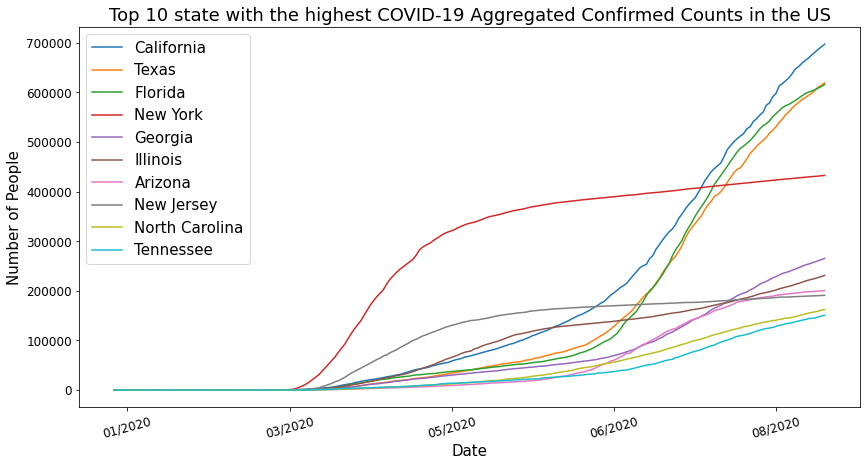
</div>

New York was the state with the most confirmed case counts before July. The top three states with the highest confirmed case counts are California, Texas, and Florida, which has surpassed New York in July.


<div>
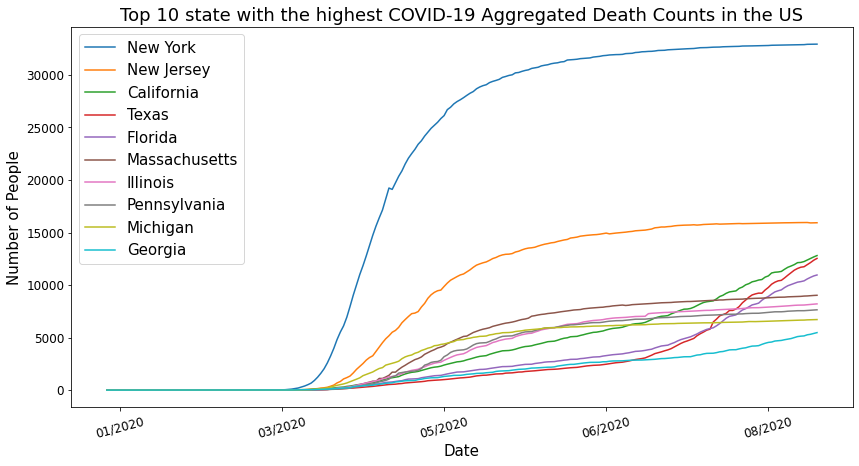
</div>

The death case counts for New York are much higher than any other states, with New Jersey, running second, but only having less than half of New York's aggregated death counts. California, Texas and Florida, being the top 3 states with most confirmed cases, rank 4th to 6th in death case counts.

Outliers that was observed from the previous boxplots are confirmed with the above two line plots. With the top 3 confirmed states having case counts of from 600,000 to 700,000, the top 5th to 10th states have less than 300,000 of confirmed case counts. Similarly with the death case counts, New York has about 35,000 death case counts, while other states do not report more than 15,000 death cases. It can be shown that the COVID-19 cases are heavily concentrated in specific states, namely New York, California, Texas, Florida, and New Jersey.

Exploratory Data Analysis (EDA) offers better understanding of the past COVID-19 data, which would facilate the next stage of Forecasting.

<a id='3'></a>
## 3. Use of Machine Learning (ML) Models

The COVID-19 data to be analyzed are time series data, showcasing confirmed or death case counts with time. There are many machine learning models that can be applied to time series data. The two models below are chosen in this project to forecast COVID-19 case counts:

&emsp; I. &nbsp; <a href='#3-1'>Autoregressive Integrated Moving Average (ARIMA) Model</a><br/>
&emsp;II. &nbsp; <a href='#3-2'>Linear Regression Model</a>

The main strategy is to first apply the model to US confirmed and death case counts data, and then if the model is desirable, the same type of model will be applied to the county-level data.

<a id='3-1'></a>

### &emsp; I.  Autoregressive Integrated Moving Average (ARIMA) Model

The ARIMA model is widely used in time series forecasting. It stands for  AutoRegressive Integrated Moving Average. <a href='#r3'> [3]</a>

* <b>AR - AutoRegression</b> uses the fact that observations are dependent on lagged observations or observations from previous dates.
* <b>I - Integrated</b> means to differentiate the data in order to make the time series stationary. Stationary data has constant mean and variance that do not vary with time.
* <b>MA - Moving Average</b> uses the relationship between an observation and a residual error for a group of lagged observations from their mean or also called the moving average. Residual error is the difference of a group of data from their mean value.

An ARIMA model has 3 parameters `ARIMA(p,d,q)`. 'p' is the lag order, which determines the number of lag or previous observations to be included. 'd' is the degree of differencing, which is the number of times the data is differenced. (Differencing means taking the difference of current data with the previous day's data.) 'q' is the order of moving average, which dictates the size of the legged observations used to calculate the moving average. <a href='#r3'> [3]</a>

Before applying the ARIMA model to the time series data, the seasonality of the data has to be deterimed. If a data is seasonal, it means the data shows specific patterns at regular intervals, yearly, monthly, weekly, or so on. Seasonal decomposition on US confirmed and death case counts are conducted on the time series data, using the builtin `seasonal_decompose` command from `statsmodels.tsa.seasonal`. 

US Confirmed Cases Seasonal Decomposition | US Death Cases Seasonal Decompostion
:---: | :---:
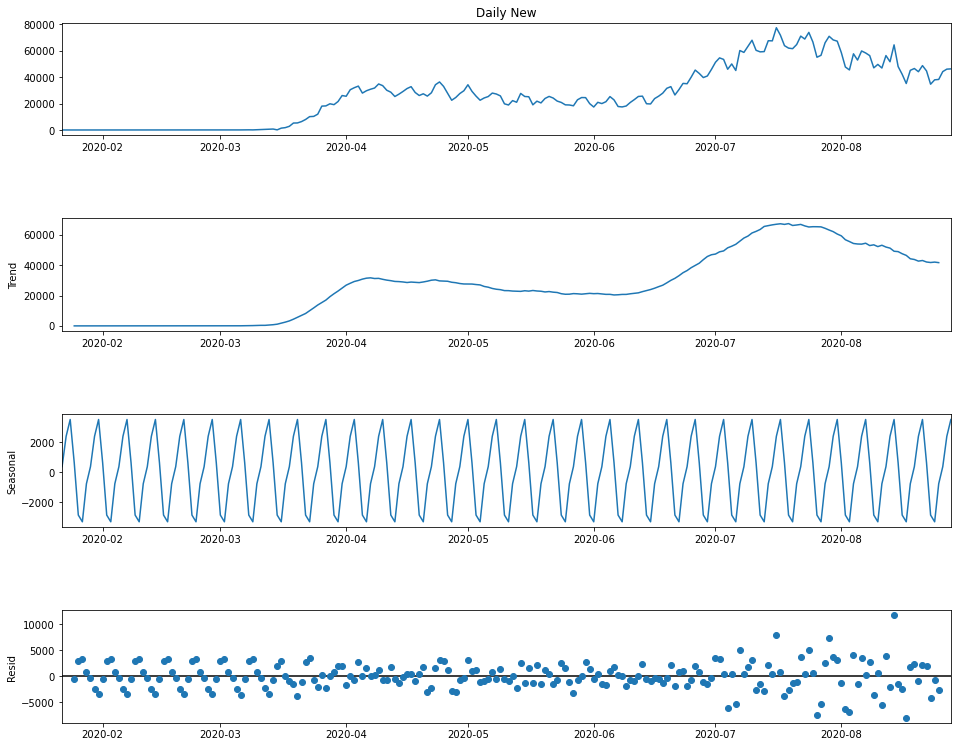 | 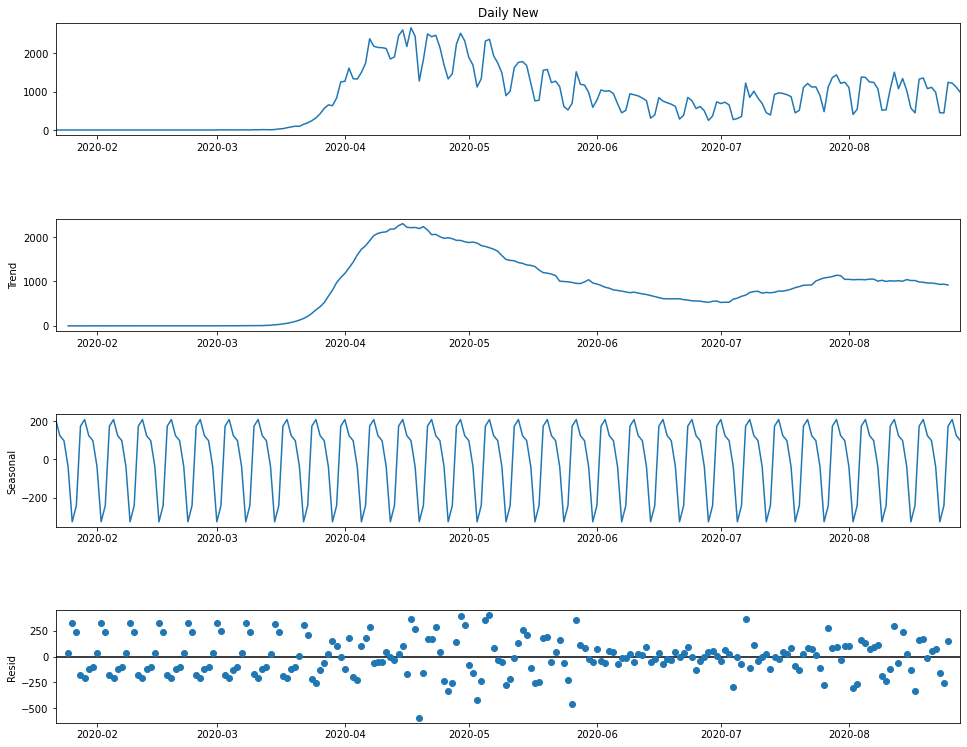
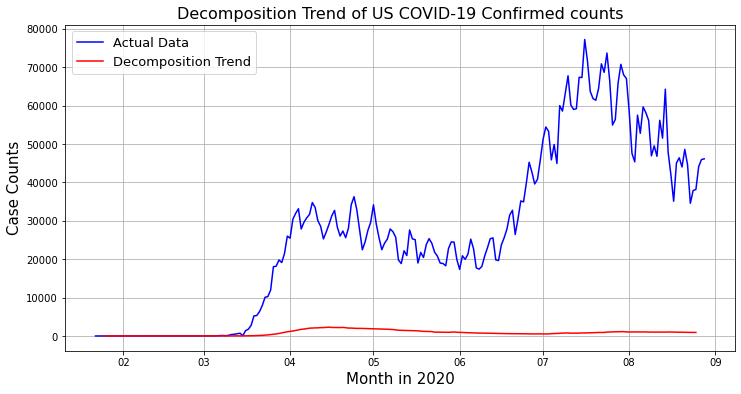 | 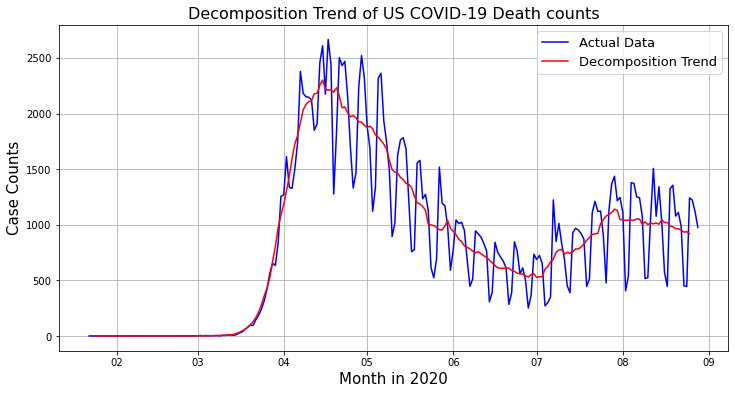


The above plots shows the trends of US COVID-19 confirmed cases and death cases counts, and that they have approximately weekly seasonoality. This is shown more visually clear in the second plot sets of decomposition trend with actual data.

After determining the seasonality of the data, the `auto_arima` function from `pmdarima` library is used to find the most optimal parameters for the ARIMA model. 

An 80% training group and 20% test group are used to test the accuracy of the model. The accuracy measure of the forecast result is shown by calculations of mean absolute percentage error (MAPE) and symmetric mean absolute percentage error (SMAPE), with MAPE being the major indicator. It is decided that an MAPE of < 25% would be acceptable in this case. 

After performing `auto_arima` on the training group for confirmed and death cases counts in the US, a model of `SARIMAX(3, 1, 2)` is determined for the confirmed cases, and `SARIMAX(4, 1, 2)` is determined for the death cases. The forecast for test group, and the error results are shown below.

Data | MAPE | SMAPE
- | - | -
US Confirmed| 42.51% | 31.64% 
US Death | 28.15% | 33.94%

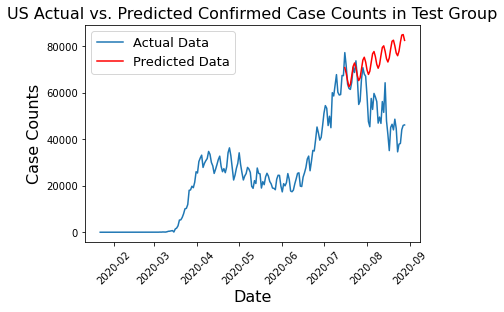 | 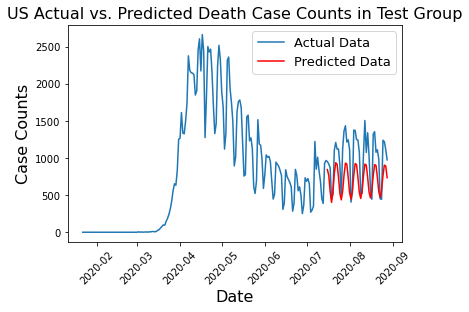
- | -

As can be seen from the errors and the line plots above, errors of the death case counts are smaller than the confirmed cases. The plot for death case prediction also seems more reasonable. However, since both MAPE errors is greater than the threshold of 25%, the ARIMA models generated from `auto_arima` are not suitable to predict the COVID-19 case counts. 

No testing was done to the county-level data, because county-level data have more variability than country-level data. The `auto_arima` method is not expected to perform well for county-level data based on its performance with the US confirmed and US death case counts.

Nonetheless, the results of the actual forecast for US confirmed cases and US death cases from the above models are demonstrated in the results section below.

<a id='3-2'></a>

### &emsp; II. Linear Regression Model

Linear regression is a supervised machine learning model. It assumes a linear relationship between the independent variable and the dependent variable. The coefficients of the linear relationship is optimized by minimizing the root mean square error (RMSE).

In this case, to make the time series data applicable for the linear regression model. The independent variable is the current case counts, and the dependent variable is the case counts with some time shift the future. That is, if one of the independent variable is case count on 2/7/2020, and the time shift is 7 days. The corresponding dependent variable is case count on 2/14/2020.

To train the model, again the first 80% of the overall data is taken as the training group, while 20% is taken as the test group. The amount of time shift is determined by experimenting with multiples of 7. To accomodate with the 25% MAPE threshold, it is found that a time shift of 7 days and 14 days are suitable for most datasets.

The model is first trained on US confirmed data and US death data. As shown below, the MAPE of predicted data after comparing to the test group's actual values, are mostly below 25%, with the exception of US confirmed cases with 14-day forecast.

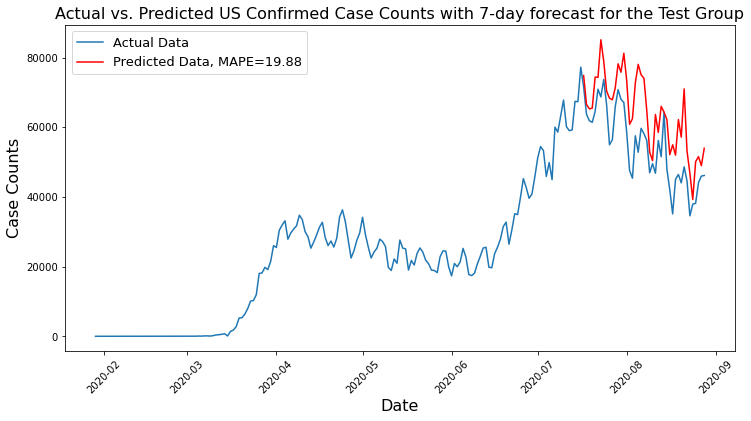 | 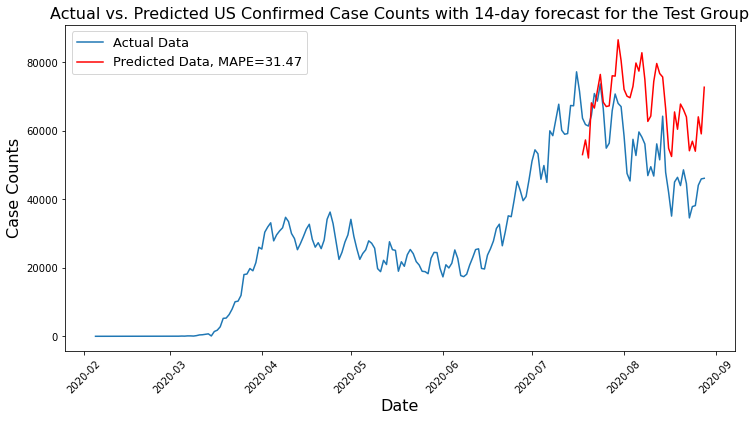
- | -

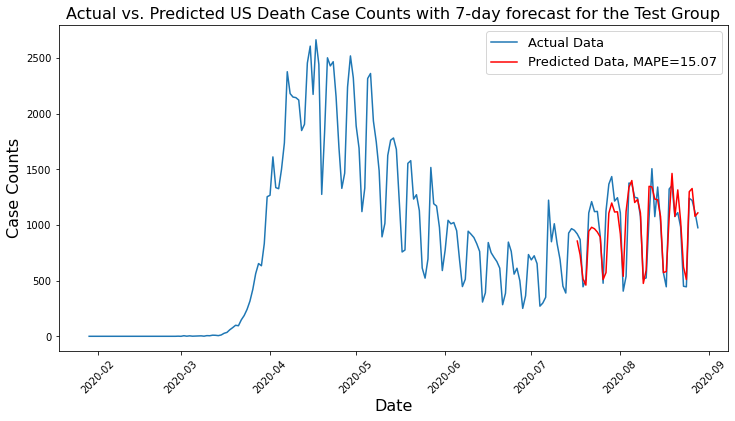 | 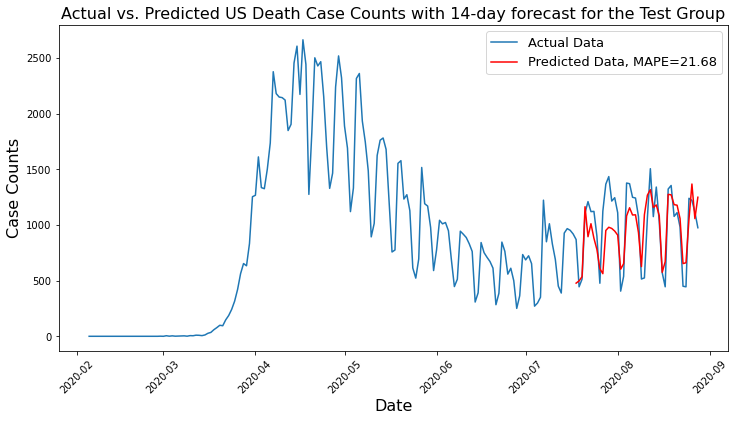
- | -

The performance on test group data is adequate, and so the model proceeds to the second stage of training with county-level data.

With 3340 counties that was tested, it is hard to show the performance of the linear regression model in each county, but MAPE results are recorded and analyzed in the table below to see what percentage of data could be predicted with linear regression model within MAPE threshold of below 25%.

Dataset | 7-day forecast within MAPE threshold | 14-day forecast within MAPE threshold
- | - | -
county confirmed |  85.69% | 67.78%
county death |  56.54% |  47.46%

Linear regression model would be better suited for confirmed case counts than confirmed case counts, but a majority of counties are within threshold for the 7 days and 14 days forecast. A potential reason for lower percentage for death counts is that the values are quite low and thus harder to predict.

<a id='4'></a>
## 4. Results and Discussion

The results of the two ML models used are in the two sections below:

&emsp; I. &nbsp; <a href='#4-1'>Autoregressive Integrated Moving Average (ARIMA) Results</a><br/>
&emsp;II. &nbsp; <a href='#4-2'>Linear Regression Results</a>

<a id='4-1'></a>

### &emsp; I.  Autoregressive Integrated Moving Average (ARIMA) Results

A 30-day forecast obtained from the `SARIMAX(3, 1, 2)` for US confirmed cases and `SARIMAX(4, 1, 2)` for US death cases are shown below. Exact forecast values are available at `"./forecast/amira_us_death_30.csv"` and `"./forecast/amira_us_confirmed_30.csv"`.

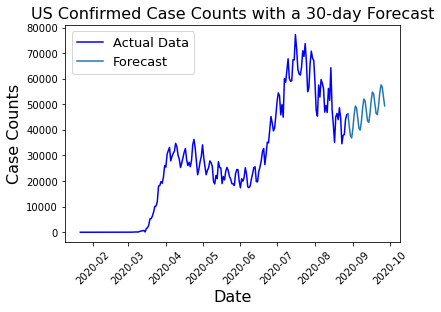 | 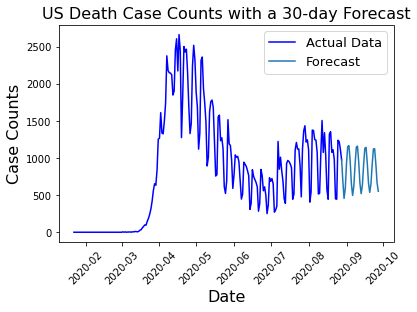
- | -

As discussed in the previous section, the MAPE values for test groups of both types of case counts are not very desirable, namely 42.51% for confirmed cases, and 28.15% for death cases, both above the acceptable 25% threshold. The test group result suggests the above forecast would not be a reliable estimation of future case counts.


<a id='4-2'></a>

### &emsp; II. Linear Regression Results

7 days and 14 days forecast of US confirmed and death case counts are shown below. Specific forecasted values are compiled in `"./forecast/us_7_forecast.csv"` for 7-day forecasts and `"./forecast/us_14_forecast.csv"` for 14-day forecasts.

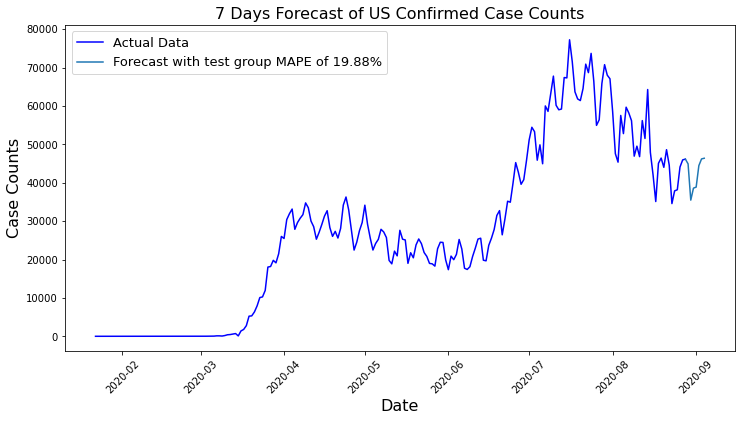 | 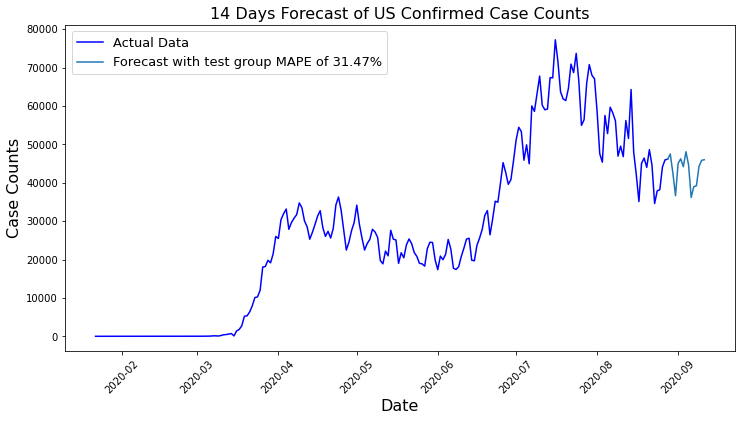
- | -

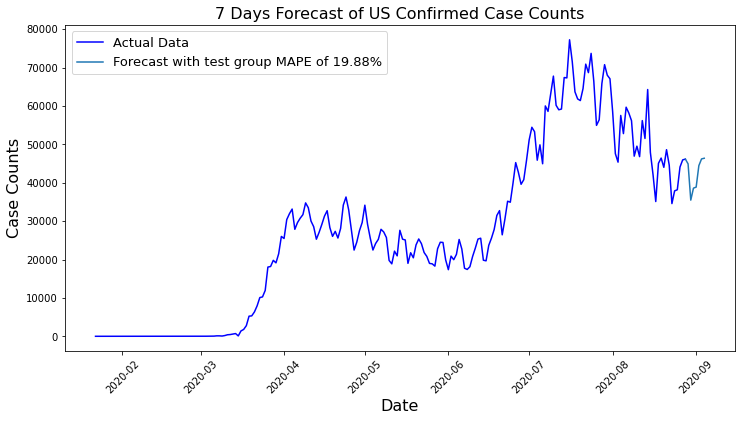| 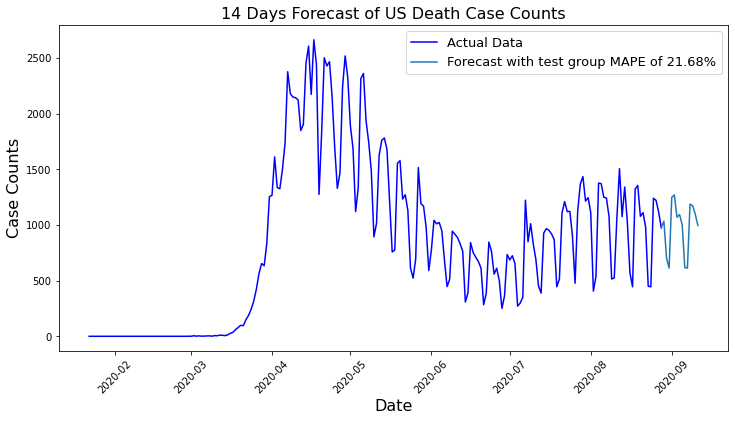
- | -

7 days and 14 days forecast of top 5 most populated counties' COVID-19 confirmed and death case counts are shown below. The estimated MAPE values are the MAPE obtained for that particular county during training and testing.

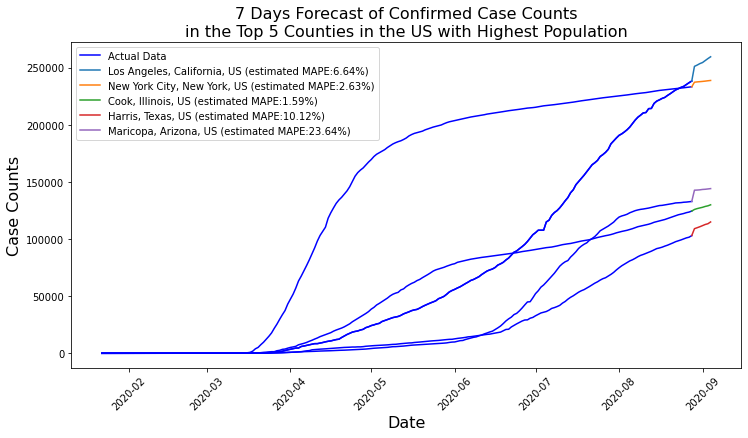 | 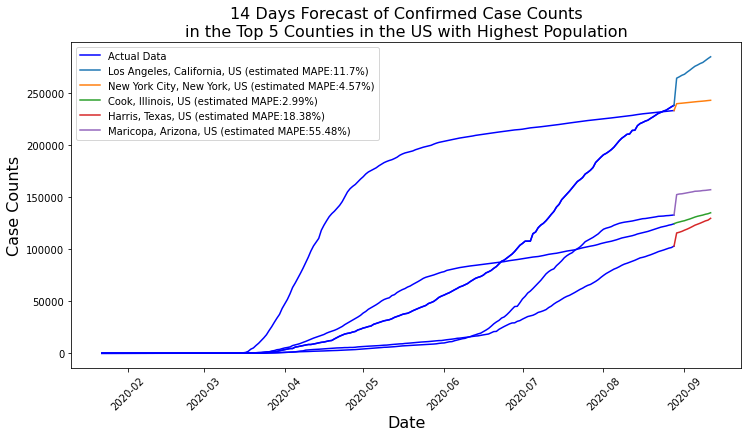
- | -

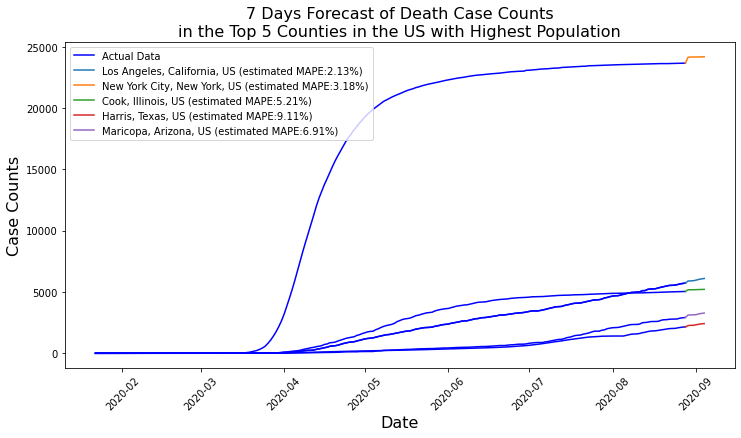 | 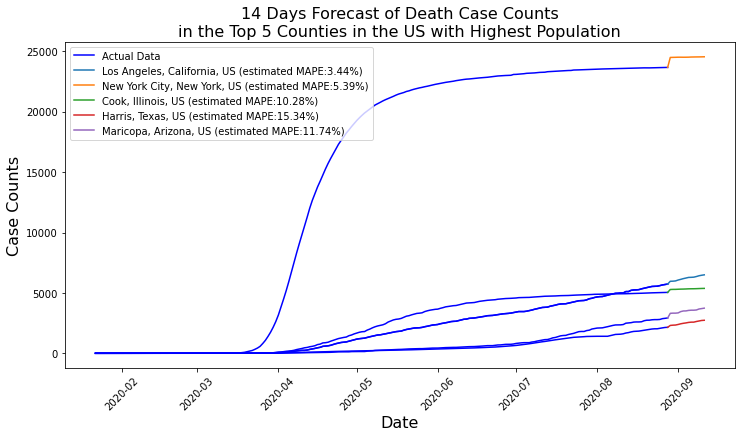
- | -

Specific forecasted values for all counties are compiled in `"./forecast/county_conf_7_forecast.csv"` for 7 days confirmed forecast, `"./forecast/county_conf_14_forecast.csv"` for 14 days confirmed forecast, `"./forecast/county_dea_7_forecast.csv"` for 7 days death forecast and `"./forecast/county_dea_14_forecast.csv"` for 14 days death forecast.

<a id='5'></a>
## 5. Conclusion

The ARIMA model and linear regression model are used to forecast COVID-19 confirmed and death case counts in the US by county. Predictions are generated for 7 days forecast and 14 days forecast using linear regression model. This is more preferable than the ARIMA model used in this project.

Improvements can be made to this project. For linear regression model, the forecast length is quite limiting, but increasing the forecasted period would significantly decrease the accuracy of the predictions. ARIMA models show more flexibility and has more capability to be adjust to fit the COVID-19 case counts, but the `auto_arima` method is limiting. Manual tuning of the parameters might be required to obtain a better fit. Another improvement can be to include factors other than the case count itself. These can include the social distancing rules, quarantine status, healthcare capacity, and so on.

The challenge faced in this project lies primarily with fitting and implementing the machine learning models. With the ARIMA model, it is hard to tune the models to obtain an acceptable fitting. With linear regression model, the forecasting period is limited. Increasing the forecasting length would compromise the model accuracy. An important reason for why both models do not provide a highly acceptable predictions is because there are only 220 data points for each case considered, and about 15% of the data being extremely low in the beginning of the outbreak.

Even though this prediction only reaches within the next two weeks, forecast like this project would help governments, hospitals, and businesses to prepare in advance. It is also pertinent in encouraging people to follow social distancing rules, wear face coverings, and practice good hygiene. We all wish the COVID-19 outbreak to be over soon, so we can safely return to our normal routines.

<a id='6'></a>
## 6. Reference
<a id='r1'></a>
[1] &emsp; Elflein, John. “COVID-19 Cases Worldwide by Day.” Statista, 28 Aug. 2020, www.statista.com/statistics/1103040/cumulative-coronavirus-covid19-cases-number-worldwide-by-day/.

<a id='r2'></a>
[2] &emsp; CSSEGISandData. (n.d.). CSSEGISandData/COVID-19. Retrieved August 29, 2020, from https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

<a id='r3'></a>
[3] &emsp; Brownlee, J. (2020, August 19). How to Create an ARIMA Model for Time Series Forecasting in Python. Retrieved August 30, 2020, from https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

<a id='7'></a>
## Appendix I: About the Author

Man Yi (Ariel) Yeung is a pre-junior student at Drexel University, pursuing a B.S. in chemical engineering, and a M.S. in cybersecurity (computer science track). This is my first data science project. Through this project, I have improved my data processing and data analysis skills. I have also became more familiar with Pandas, Matplotlib, and machine learning models.